In [1]:
#ANDRES LO NECESITA
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Mounted at /content/drive


## Tarea 3: Exploracion de datos


3. Tarea 3: Exploracion de datos
3.1 Analisis datos numéricos
3.2 Analisis variables categóricos/cualitativas
3.3 Búsqueda de relaciones con la variable objetivo
3.4 Preparación de datos: Arreglo nulos y Datos atipicos



In [2]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats
from sklearn.linear_model import Lasso

/var/folders/0_/th2rpmh97_l2bfdwmjhwgng00000gn/T/ipykernel_11819/4245219705.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)

In [ ]:
#ANDRES LO NECESITA
path = '/content/drive/MyDrive/Colab Notebooks/Analítica Computacional/Proyecto 1/data.txt' # Andrés
data_df = pd.read_csv(path, sep=',')
data_df.head()

In [4]:
data_df = pd.read_csv("data.txt", sep=',')
data_df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


### 3.1 Análisis datos numéricos


count    1197.000000
mean        0.729632
std         0.097891
min         0.070000
25%         0.700000
50%         0.750000
75%         0.800000
max         0.800000
Name: targeted_productivity, dtype: float64


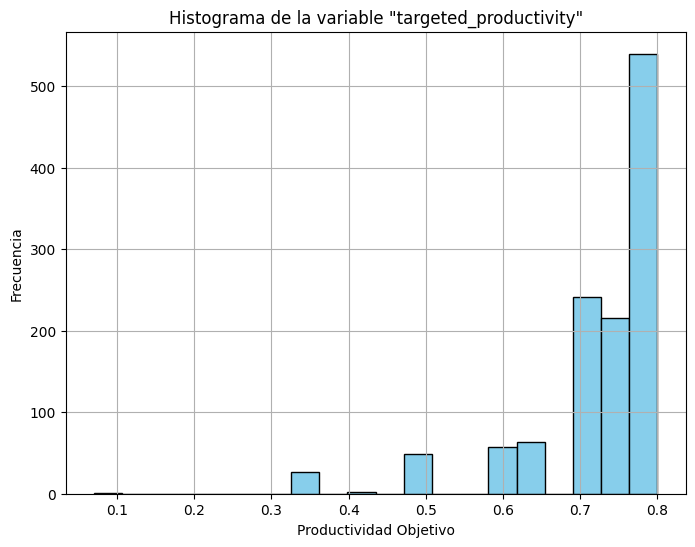

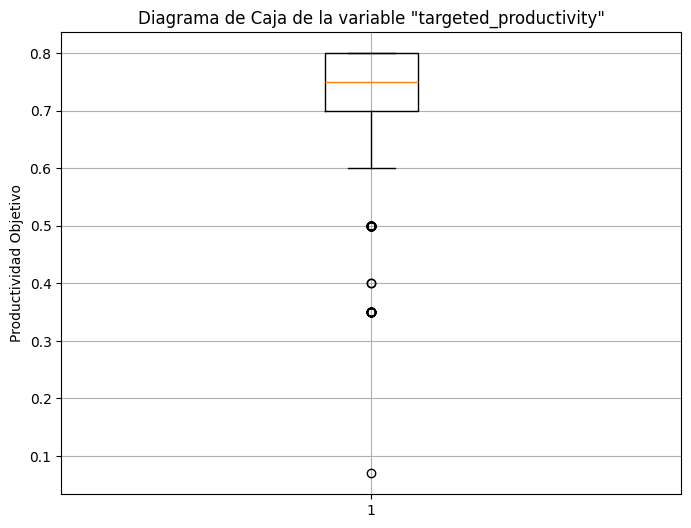

In [5]:
# Descripción de la variable 'targeted_productivity'
targeted_productivity_description = data_df['targeted_productivity'].describe()
print(targeted_productivity_description)

# Histograma de la variable 'targeted_productivity'
plt.figure(figsize=(8, 6))
plt.hist(data_df['targeted_productivity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de la variable "targeted_productivity"')
plt.xlabel('Productividad Objetivo')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Boxplot de la variable 'targeted_productivity'
plt.figure(figsize=(8, 6))
plt.boxplot(data_df['targeted_productivity'])
plt.title('Diagrama de Caja de la variable "targeted_productivity"')
plt.ylabel('Productividad Objetivo')
plt.grid(True)
plt.show()

count    1197.000000
mean       15.062172
std        10.943219
min         2.900000
25%         3.940000
50%        15.260000
75%        24.260000
max        54.560000
Name: smv, dtype: float64


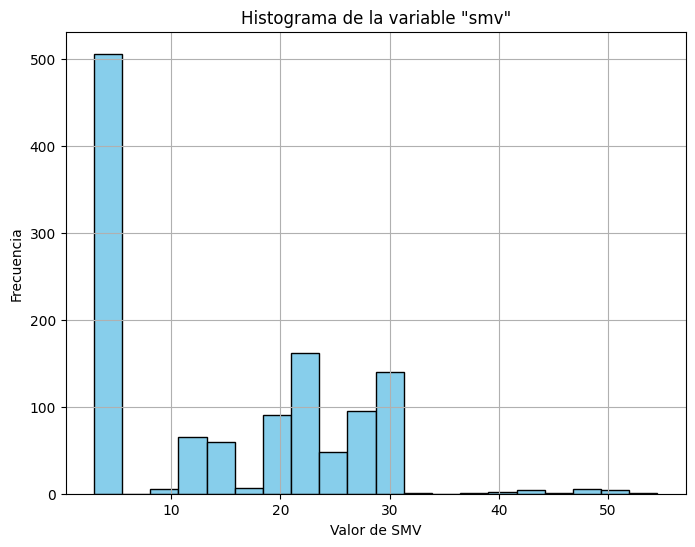

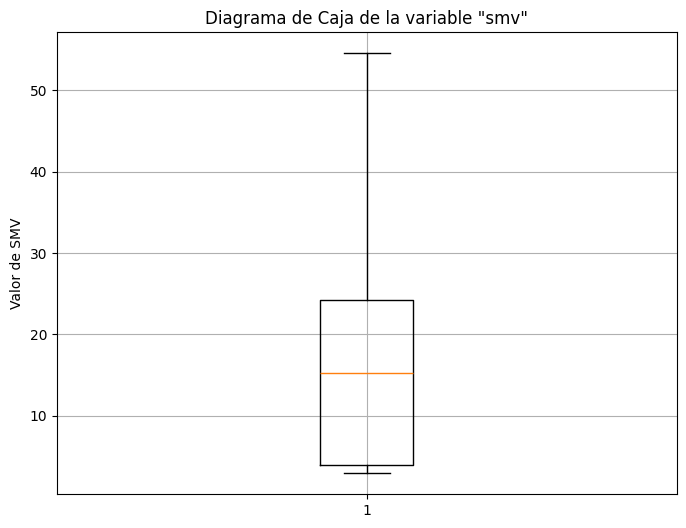

In [6]:
# Descripción de la variable 'smv'
smv_description = data_df['smv'].describe()
print(smv_description)

# Histograma de la variable 'smv'
plt.figure(figsize=(8, 6))
plt.hist(data_df['smv'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de la variable "smv"')
plt.xlabel('Valor de SMV')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Boxplot de la variable 'smv'
plt.figure(figsize=(8, 6))
plt.boxplot(data_df['smv'])
plt.title('Diagrama de Caja de la variable "smv"')
plt.ylabel('Valor de SMV')
plt.grid(True)
plt.show()

count      691.000000
mean      1190.465991
std       1837.455001
min          7.000000
25%        774.500000
50%       1039.000000
75%       1252.500000
max      23122.000000
Name: wip, dtype: float64


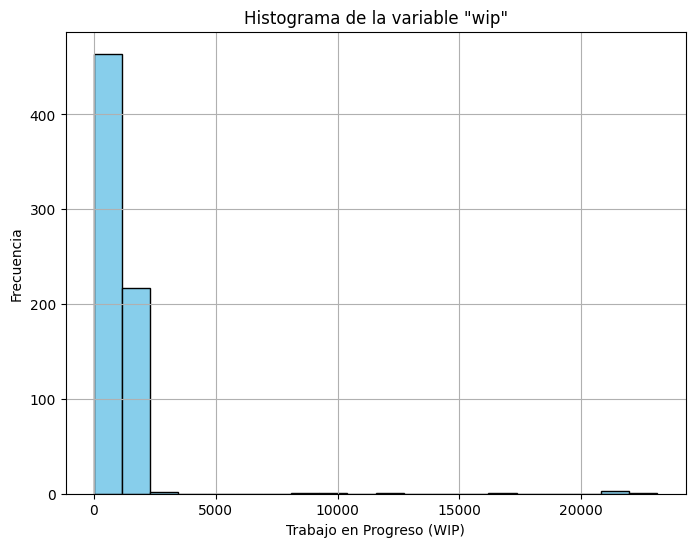

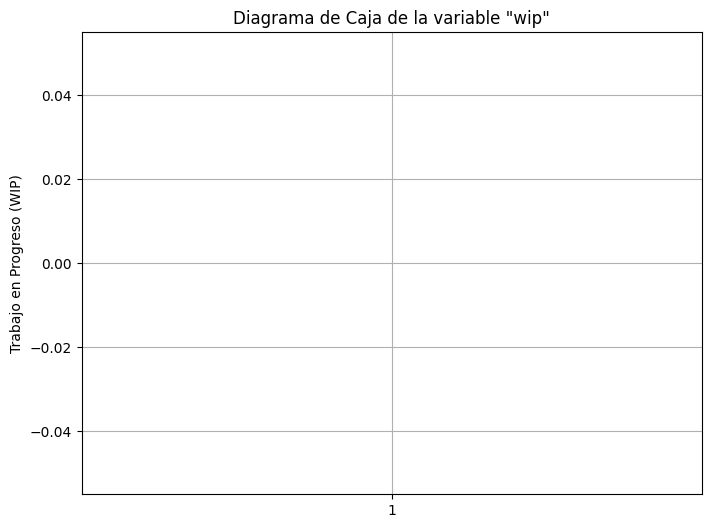

In [7]:
# Descripción de la variable 'wip'
wip_description = data_df['wip'].describe()
print(wip_description)

# Histograma de la variable 'wip'
plt.figure(figsize=(8, 6))
plt.hist(data_df['wip'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de la variable "wip"')
plt.xlabel('Trabajo en Progreso (WIP)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Boxplot de la variable 'wip'
plt.figure(figsize=(8, 6))
plt.boxplot(data_df['wip'])
plt.title('Diagrama de Caja de la variable "wip"')
plt.ylabel('Trabajo en Progreso (WIP)')
plt.grid(True)
plt.show()

count     1197.000000
mean      4567.460317
std       3348.823563
min          0.000000
25%       1440.000000
50%       3960.000000
75%       6960.000000
max      25920.000000
Name: over_time, dtype: float64


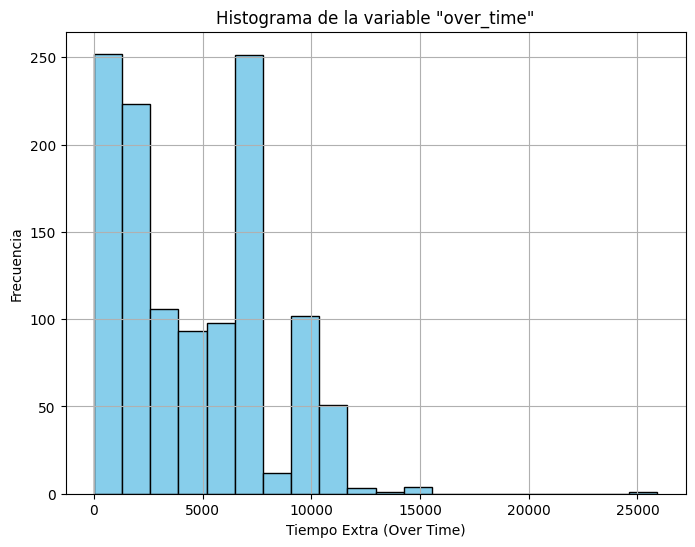

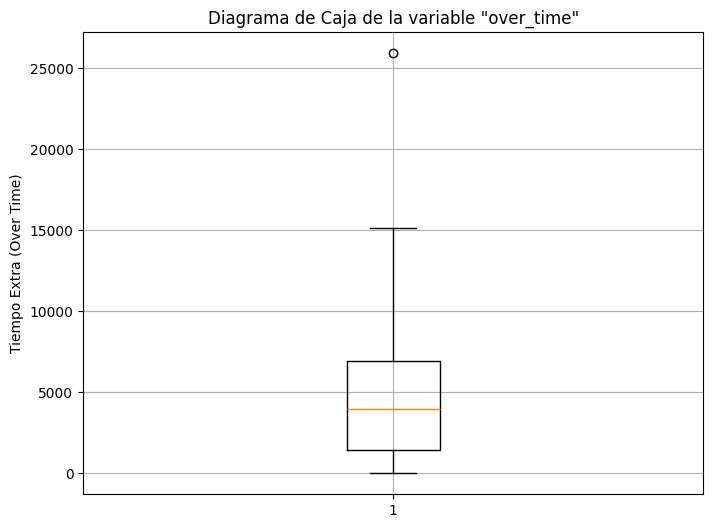

In [8]:
# Descripción de la variable 'over_time'
over_time_description = data_df['over_time'].describe()
print(over_time_description)

# Histograma de la variable 'over_time'
plt.figure(figsize=(8, 6))
plt.hist(data_df['over_time'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de la variable "over_time"')
plt.xlabel('Tiempo Extra (Over Time)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Boxplot de la variable 'over_time'
plt.figure(figsize=(8, 6))
plt.boxplot(data_df['over_time'])
plt.title('Diagrama de Caja de la variable "over_time"')
plt.ylabel('Tiempo Extra (Over Time)')
plt.grid(True)
plt.show()

count    1197.000000
mean       38.210526
std       160.182643
min         0.000000
25%         0.000000
50%         0.000000
75%        50.000000
max      3600.000000
Name: incentive, dtype: float64


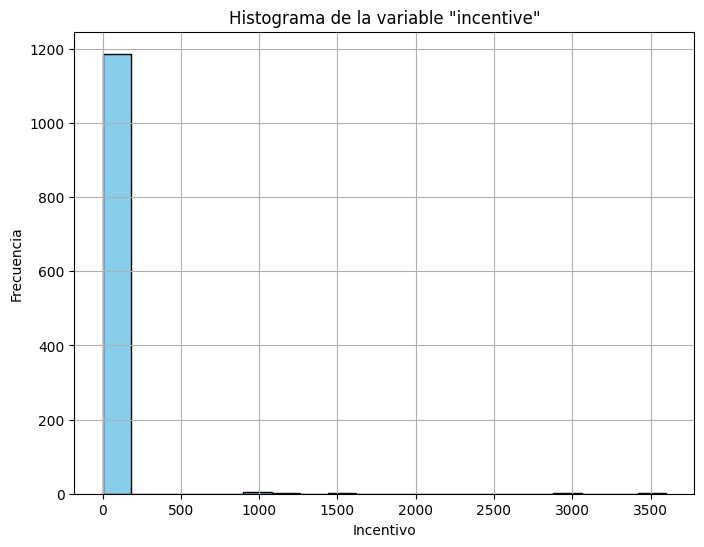

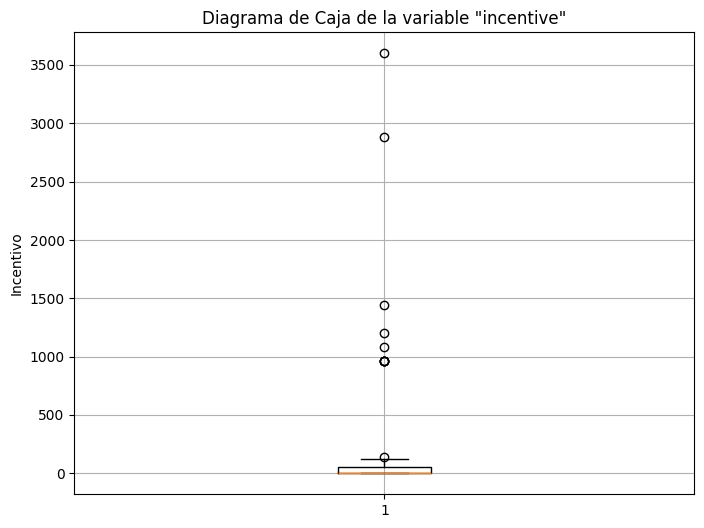

In [9]:
# Descripción de la variable 'incentive'
incentive_description = data_df['incentive'].describe()
print(incentive_description)

# Histograma de la variable 'incentive'
plt.figure(figsize=(8, 6))
plt.hist(data_df['incentive'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de la variable "incentive"')
plt.xlabel('Incentivo')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Boxplot de la variable 'incentive'
plt.figure(figsize=(8, 6))
plt.boxplot(data_df['incentive'])
plt.title('Diagrama de Caja de la variable "incentive"')
plt.ylabel('Incentivo')
plt.grid(True)
plt.show()

In [12]:
unicos_incentive = data_df['incentive'].unique()
print(unicos_incentive)

# Contar la cantidad de ocurrencias de cada valor único en la columna 'incentive'
conteo_valores = data_df['incentive'].value_counts()

# Imprimir los valores únicos y su conteo
for valor in unicos_incentive:
    cantidad = conteo_valores[valor]
    print(f"Valor único: {valor}, Cantidad: {cantidad}")

[  98    0   50   38   45   34   44   63   56   40   60   26   75   23
   35   69   88   30   54   37   70   27   21   24   94   29   81   55
  119   90  113   46  100   53   93   49  138   33   32   62   65  960
 1080 2880 3600 1440 1200   25]
Valor único: 98, Cantidad: 1
Valor único: 0, Cantidad: 604
Valor único: 50, Cantidad: 113
Valor único: 38, Cantidad: 29
Valor único: 45, Cantidad: 54
Valor único: 34, Cantidad: 17
Valor único: 44, Cantidad: 4
Valor único: 63, Cantidad: 61
Valor único: 56, Cantidad: 14
Valor único: 40, Cantidad: 27
Valor único: 60, Cantidad: 28
Valor único: 26, Cantidad: 9
Valor único: 75, Cantidad: 24
Valor único: 23, Cantidad: 38
Valor único: 35, Cantidad: 5
Valor único: 69, Cantidad: 6
Valor único: 88, Cantidad: 19
Valor único: 30, Cantidad: 52
Valor único: 54, Cantidad: 1
Valor único: 37, Cantidad: 1
Valor único: 70, Cantidad: 6
Valor único: 27, Cantidad: 2
Valor único: 21, Cantidad: 1
Valor único: 24, Cantidad: 2
Valor único: 94, Cantidad: 4
Valor único: 29,

count    1197.000000
mean        0.730159
std        12.709757
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       300.000000
Name: idle_time, dtype: float64


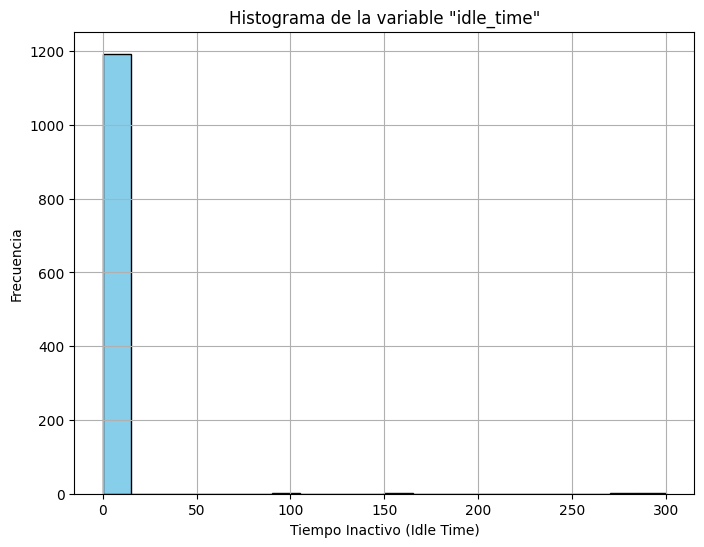

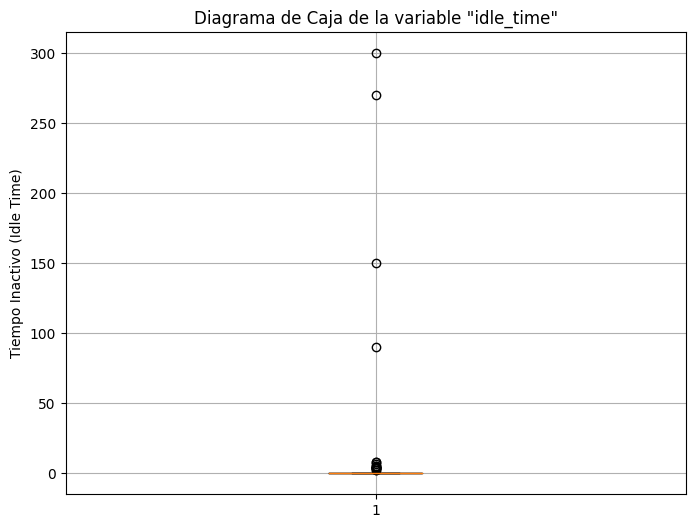

In [13]:
# Descripción de la variable 'idle_time'
idle_time_description = data_df['idle_time'].describe()
print(idle_time_description)

# Histograma de la variable 'idle_time'
plt.figure(figsize=(8, 6))
plt.hist(data_df['idle_time'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de la variable "idle_time"')
plt.xlabel('Tiempo Inactivo (Idle Time)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Boxplot de la variable 'idle_time'
plt.figure(figsize=(8, 6))
plt.boxplot(data_df['idle_time'])
plt.title('Diagrama de Caja de la variable "idle_time"')
plt.ylabel('Tiempo Inactivo (Idle Time)')
plt.grid(True)
plt.show()

In [14]:
unicos_idle_time = data_df['idle_time'].unique()
print(unicos_idle_time)

# Contar la cantidad de ocurrencias de cada valor único en la columna 'idle_time'
conteo_valores = data_df['idle_time'].value_counts()

# Imprimir los valores únicos y su conteo
for valor in unicos_idle_time:
    cantidad = conteo_valores[valor]
    print(f"Valor único: {valor}, Cantidad: {cantidad}")

[  0.   90.  150.  270.  300.    2.    5.    8.    4.5   3.5   4.    6.5]
Valor único: 0.0, Cantidad: 1179
Valor único: 90.0, Cantidad: 1
Valor único: 150.0, Cantidad: 1
Valor único: 270.0, Cantidad: 1
Valor único: 300.0, Cantidad: 1
Valor único: 2.0, Cantidad: 2
Valor único: 5.0, Cantidad: 2
Valor único: 8.0, Cantidad: 2
Valor único: 4.5, Cantidad: 2
Valor único: 3.5, Cantidad: 3
Valor único: 4.0, Cantidad: 2
Valor único: 6.5, Cantidad: 1


count    1197.000000
mean        0.369256
std         3.268987
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        45.000000
Name: idle_men, dtype: float64


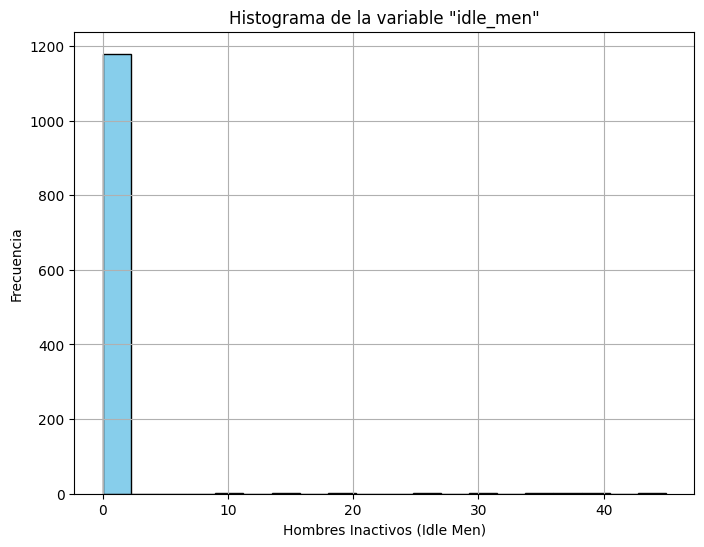

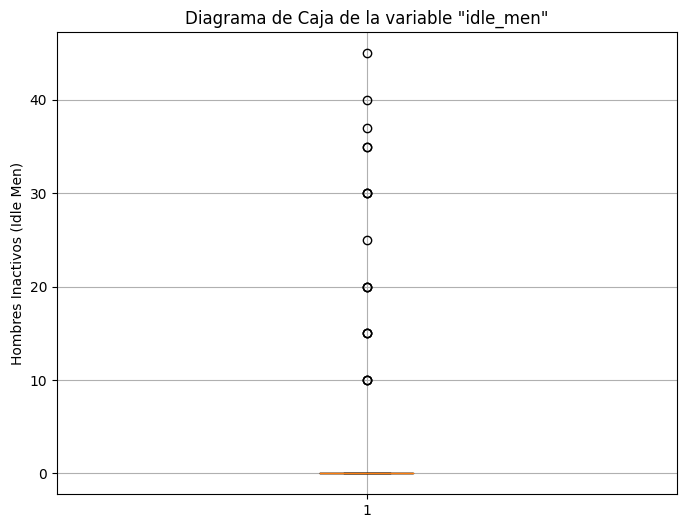

In [17]:
# Descripción de la variable 'idle_men'
idle_men_description = data_df['idle_men'].describe()
print(idle_men_description)

# Histograma de la variable 'idle_men'
plt.figure(figsize=(8, 6))
plt.hist(data_df['idle_men'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de la variable "idle_men"')
plt.xlabel('Hombres Inactivos (Idle Men)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Boxplot de la variable 'idle_men'
plt.figure(figsize=(8, 6))
plt.boxplot(data_df['idle_men'])
plt.title('Diagrama de Caja de la variable "idle_men"')
plt.ylabel('Hombres Inactivos (Idle Men)')
plt.grid(True)
plt.show()

In [18]:
unicos_idle_men = data_df['idle_men'].unique()
print(unicos_idle_time)

# Contar la cantidad de ocurrencias de cada valor único en la columna 'idle_men'
conteo_valores = data_df['idle_men'].value_counts()

# Imprimir los valores únicos y su conteo
for valor in unicos_idle_men:
    cantidad = conteo_valores[valor]
    print(f"Valor único: {valor}, Cantidad: {cantidad}")

[  0.   90.  150.  270.  300.    2.    5.    8.    4.5   3.5   4.    6.5]
Valor único: 0, Cantidad: 1179
Valor único: 10, Cantidad: 3
Valor único: 15, Cantidad: 3
Valor único: 45, Cantidad: 1
Valor único: 37, Cantidad: 1
Valor único: 30, Cantidad: 3
Valor único: 35, Cantidad: 2
Valor único: 20, Cantidad: 3
Valor único: 25, Cantidad: 1
Valor único: 40, Cantidad: 1


count    1197.000000
mean        0.150376
std         0.427848
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: no_of_style_change, dtype: float64


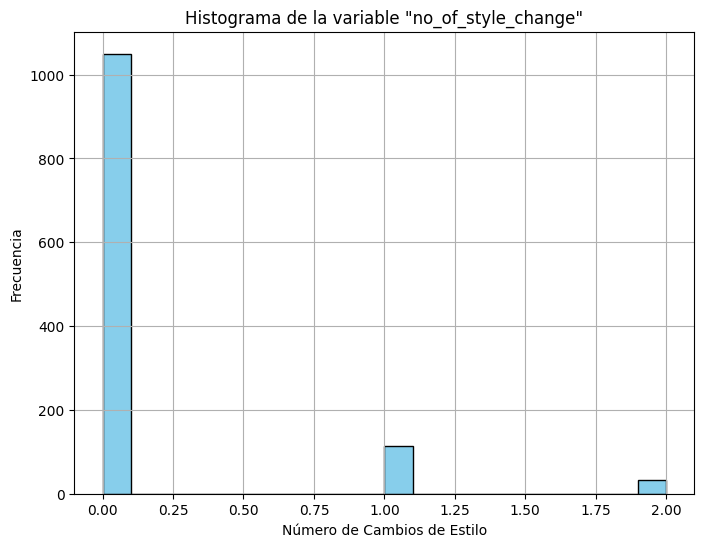

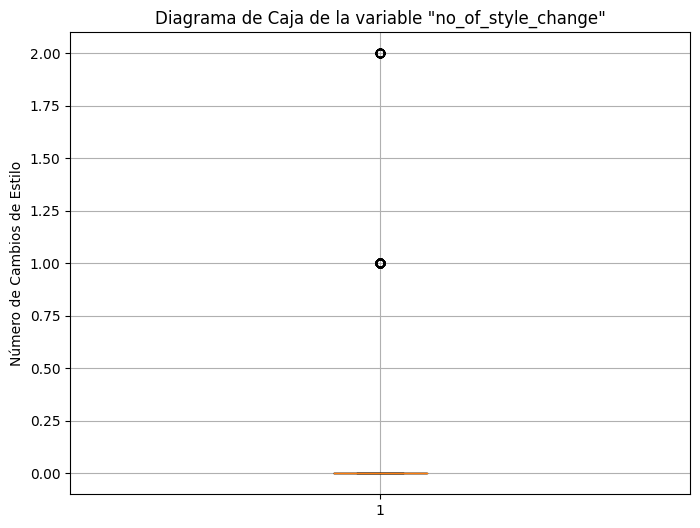

In [19]:
# Descripción de la variable 'no_of_style_change'
no_of_style_change_description = data_df['no_of_style_change'].describe()
print(no_of_style_change_description)

# Histograma de la variable 'no_of_style_change'
plt.figure(figsize=(8, 6))
plt.hist(data_df['no_of_style_change'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de la variable "no_of_style_change"')
plt.xlabel('Número de Cambios de Estilo')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Boxplot de la variable 'no_of_style_change'
plt.figure(figsize=(8, 6))
plt.boxplot(data_df['no_of_style_change'])
plt.title('Diagrama de Caja de la variable "no_of_style_change"')
plt.ylabel('Número de Cambios de Estilo')
plt.grid(True)
plt.show()

In [21]:
unicos_no_of_style_change = data_df['no_of_style_change'].unique()
print(unicos_no_of_style_change)

# Contar la cantidad de ocurrencias de cada valor único en la columna 'idle_men'
conteo_valores = data_df['no_of_style_change'].value_counts()

# Imprimir los valores únicos y su conteo
for valor in unicos_no_of_style_change:
    cantidad = conteo_valores[valor]
    print(f"Valor único: {valor}, Cantidad: {cantidad}")

[0 1 2]
Valor único: 0, Cantidad: 1050
Valor único: 1, Cantidad: 114
Valor único: 2, Cantidad: 33


count    1197.000000
mean       34.609858
std        22.197687
min         2.000000
25%         9.000000
50%        34.000000
75%        57.000000
max        89.000000
Name: no_of_workers, dtype: float64


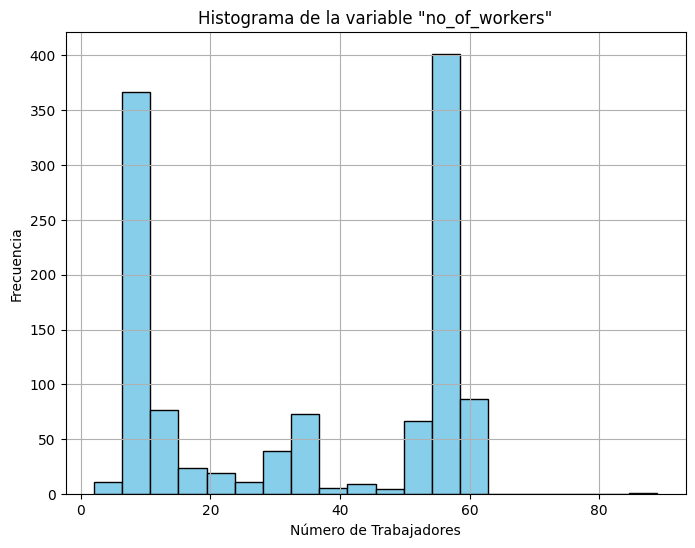

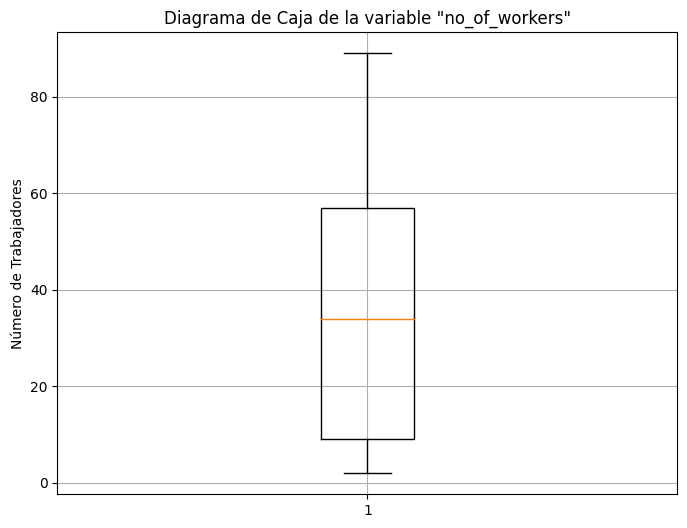

In [22]:
# Descripción de la variable 'no_of_workers'
no_of_workers_description = data_df['no_of_workers'].describe()
print(no_of_workers_description)

# Histograma de la variable 'no_of_workers'
plt.figure(figsize=(8, 6))
plt.hist(data_df['no_of_workers'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de la variable "no_of_workers"')
plt.xlabel('Número de Trabajadores')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Boxplot de la variable 'no_of_workers'
plt.figure(figsize=(8, 6))
plt.boxplot(data_df['no_of_workers'])
plt.title('Diagrama de Caja de la variable "no_of_workers"')
plt.ylabel('Número de Trabajadores')
plt.grid(True)
plt.show()

count    1197.000000
mean        0.735091
std         0.174488
min         0.233705
25%         0.650307
50%         0.773333
75%         0.850253
max         1.120437
Name: actual_productivity, dtype: float64


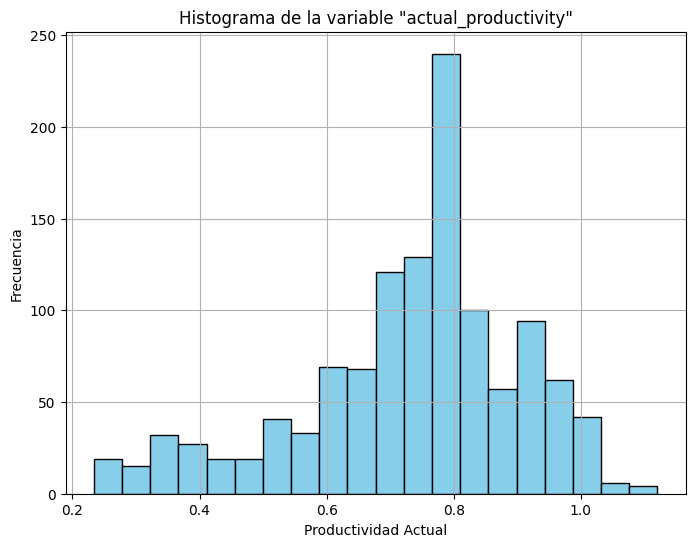

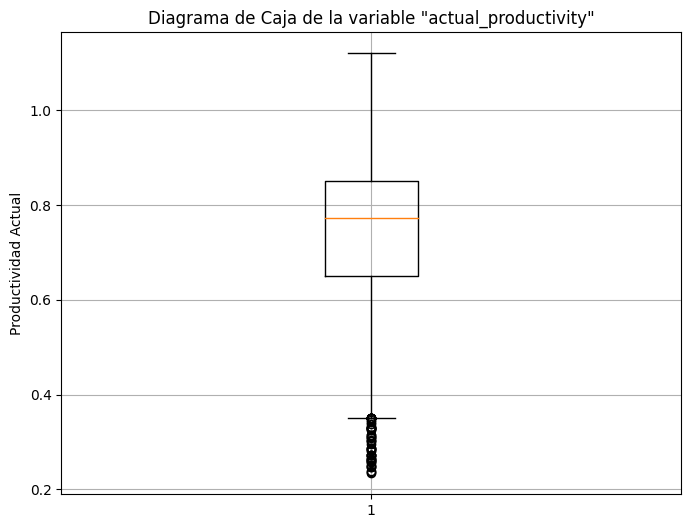

In [23]:
# Descripción de la variable 'actual_productivity'
actual_productivity_description = data_df['actual_productivity'].describe()
print(actual_productivity_description)

# Histograma de la variable 'actual_productivity'
plt.figure(figsize=(8, 6))
plt.hist(data_df['actual_productivity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de la variable "actual_productivity"')
plt.xlabel('Productividad Actual')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Boxplot de la variable 'actual_productivity'
plt.figure(figsize=(8, 6))
plt.boxplot(data_df['actual_productivity'])
plt.title('Diagrama de Caja de la variable "actual_productivity"')
plt.ylabel('Productividad Actual')
plt.grid(True)
plt.show()

### 3.2 Análisis datos categóricos



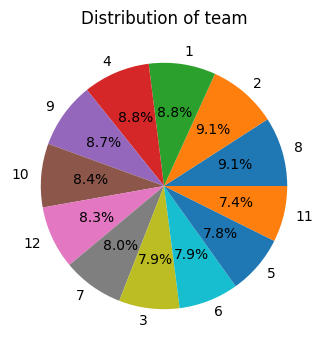

In [24]:
data_df['team'].value_counts().plot(kind='pie', figsize=(4, 4), autopct='%1.1f%%')
plt.title('Distribution of team')
plt.ylabel('')
plt.show()


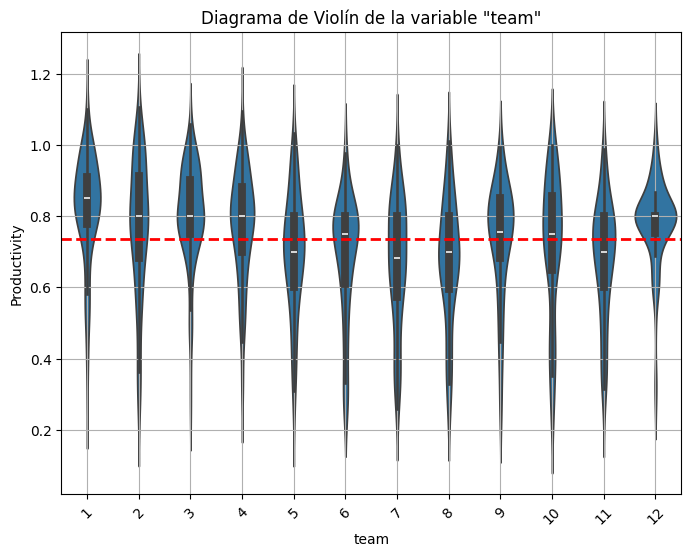

    team  Frecuencia
0      8         109
1      2         109
2      1         105
3      4         105
4      9         104
5     10         100
6     12          99
7      7          96
8      3          95
9      6          94
10     5          93
11    11          88


<ipython-input-25-136b8fd1bba7>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='team', data=data_df, palette='viridis', order = data_df['team'].value_counts().index)


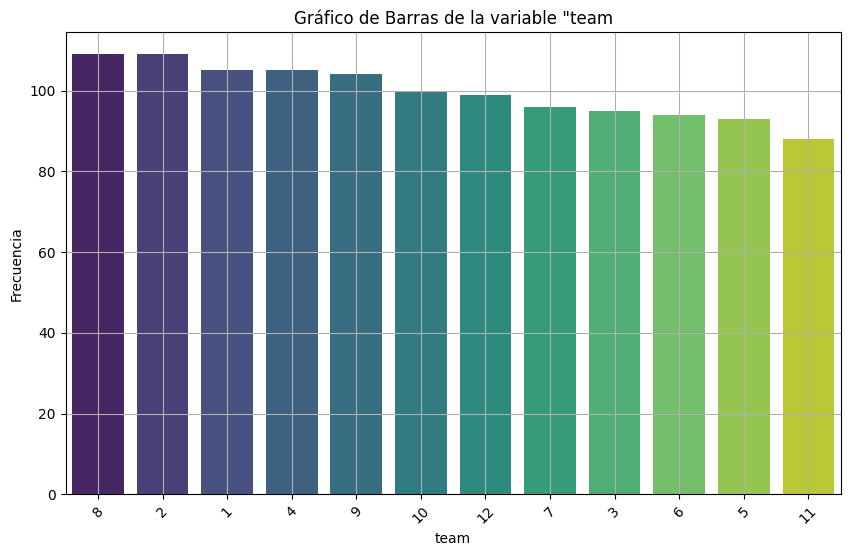

In [25]:
# Calcula el promedio de la variable Y
promedio_y = data_df['actual_productivity'].mean()

# Diagrama de Violín de la variable 'team'
plt.figure(figsize=(8, 6))
sns.violinplot(x='team', y = 'actual_productivity', data=data_df)
plt.axhline(promedio_y, color='red', linestyle='--', linewidth=2)  # Agrega la línea horizontal para el promedio
plt.title('Diagrama de Violín de la variable "team"')
plt.xlabel('team')
plt.ylabel('Productivity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Tabla de Frecuencia de la variable 'team'
date_frequency_table = data_df['team'].value_counts().reset_index()
date_frequency_table.columns = ['team', 'Frecuencia']
print(date_frequency_table)

# Gráfico de Barras de la variable 'team'
plt.figure(figsize=(10, 6))
sns.countplot(x='team', data=data_df, palette='viridis', order = data_df['team'].value_counts().index)
plt.title('Gráfico de Barras de la variable "team')
plt.xlabel('team')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

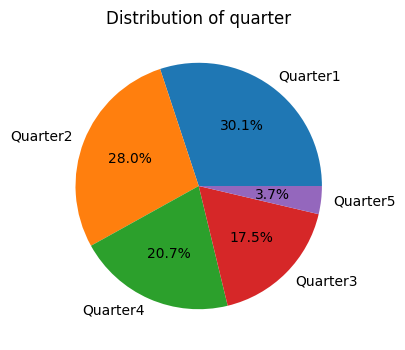

In [26]:
data_df['quarter'].value_counts().plot(kind='pie', figsize=(4, 4), autopct='%1.1f%%')
plt.title('Distribution of quarter')
plt.ylabel('')
plt.show()

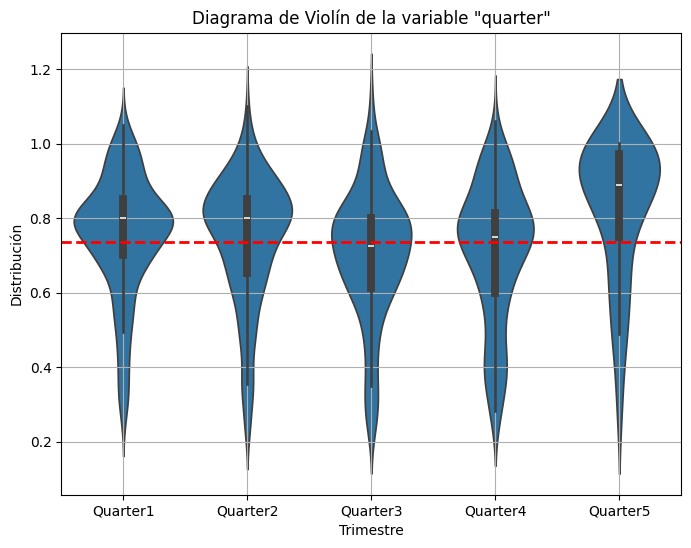

  Trimestre  Frecuencia
0  Quarter1         360
1  Quarter2         335
2  Quarter4         248
3  Quarter3         210
4  Quarter5          44


<ipython-input-27-de3df2b89cd7>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quarter', data=data_df, palette='viridis', order = data_df['quarter'].value_counts().index)


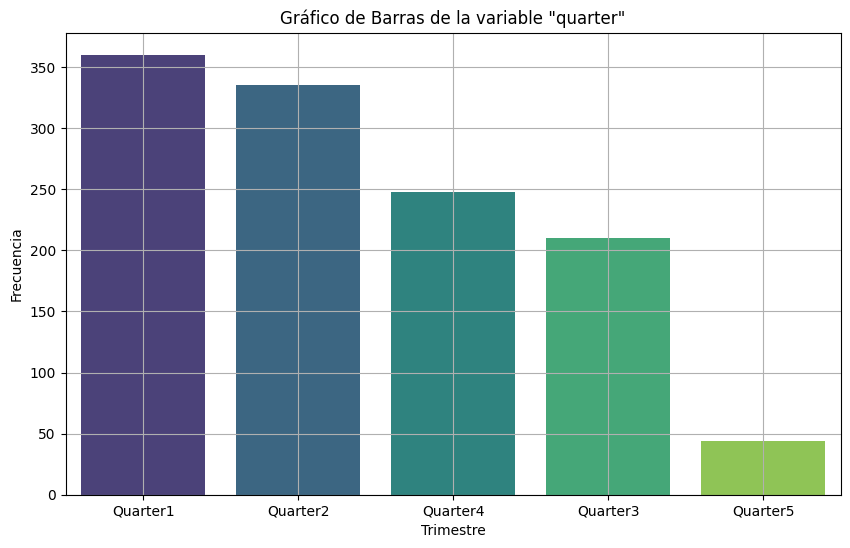

In [27]:
# Calcula el promedio de la variable Y
promedio_y = data_df['actual_productivity'].mean()

# Diagrama de Violín de la variable 'quarter'
plt.figure(figsize=(8, 6))
sns.violinplot(x='quarter', y = 'actual_productivity', data=data_df)
plt.axhline(promedio_y, color='red', linestyle='--', linewidth=2)  # Agrega la línea horizontal para el promedio
plt.title('Diagrama de Violín de la variable "quarter"')
plt.xlabel('Trimestre')
plt.ylabel('Distribución')
plt.grid(True)
plt.show()

# Tabla de Frecuencia de la variable 'quarter'
quarter_frequency_table = data_df['quarter'].value_counts().reset_index()
quarter_frequency_table.columns = ['Trimestre', 'Frecuencia']
print(quarter_frequency_table)

# Gráfico de Barras de la variable 'quarter'
plt.figure(figsize=(10, 6))
sns.countplot(x='quarter', data=data_df, palette='viridis', order = data_df['quarter'].value_counts().index)
plt.title('Gráfico de Barras de la variable "quarter"')
plt.xlabel('Trimestre')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [28]:
unique_categories = data_df['quarter'].unique()
unique_categories.shape[0]

5

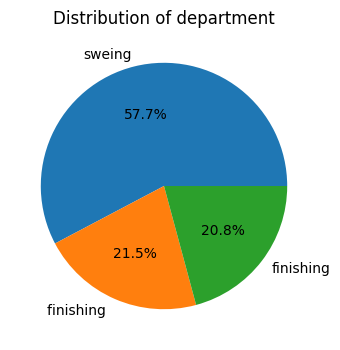

In [29]:
data_df['department'].value_counts().plot(kind='pie', figsize=(4, 4), autopct='%1.1f%%')
plt.title('Distribution of department')
plt.ylabel('')
plt.show()

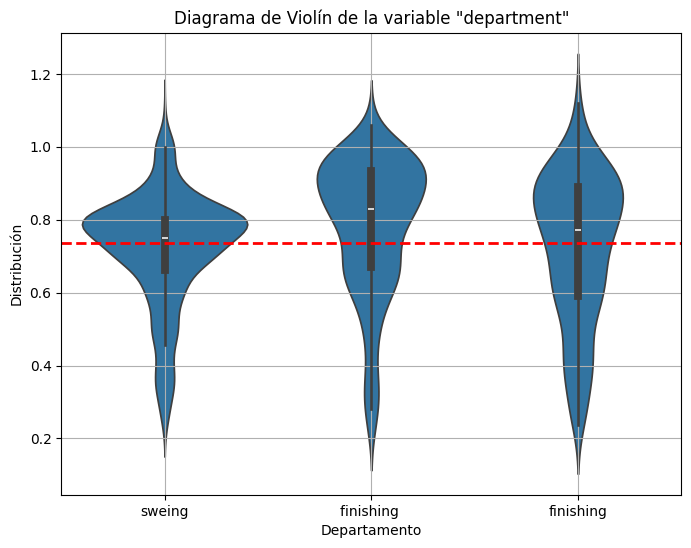

  Departamento  Frecuencia
0       sweing         691
1   finishing          257
2    finishing         249


<ipython-input-30-2694b78dd91e>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='department', data=data_df, palette='viridis', order = data_df['department'].value_counts().index)


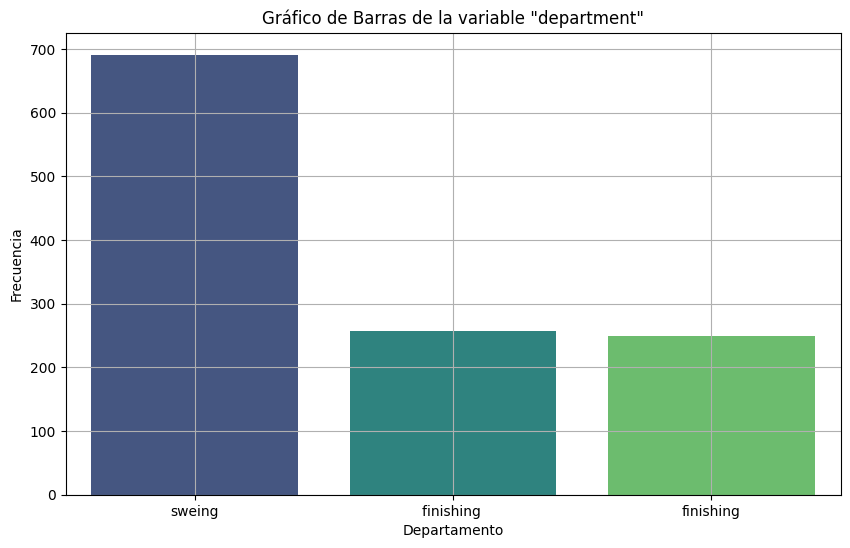

In [30]:
# Calcula el promedio de la variable Y
promedio_y = data_df['actual_productivity'].mean()
# Diagrama de Violín de la variable 'department'
plt.figure(figsize=(8, 6))
sns.violinplot(x='department', y = 'actual_productivity', data=data_df)
plt.axhline(promedio_y, color='red', linestyle='--', linewidth=2)  # Agrega la línea horizontal para el promedio
plt.title('Diagrama de Violín de la variable "department"')
plt.xlabel('Departamento')
plt.ylabel('Distribución')
plt.grid(True)
plt.show()

# Tabla de Frecuencia de la variable 'department'
department_frequency_table = data_df['department'].value_counts().reset_index()
department_frequency_table.columns = ['Departamento', 'Frecuencia']
print(department_frequency_table)

# Gráfico de Barras de la variable 'department'
plt.figure(figsize=(10, 6))
sns.countplot(x='department', data=data_df, palette='viridis', order = data_df['department'].value_counts().index)
plt.title('Gráfico de Barras de la variable "department"')
plt.xlabel('Departamento')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [31]:
unique_categories = data_df['department'].unique()
unique_categories.shape[0]

3

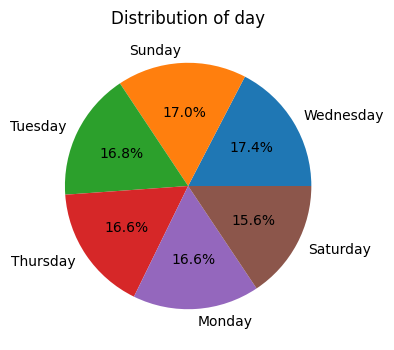

In [32]:
data_df['day'].value_counts().plot(kind='pie', figsize=(4, 4), autopct='%1.1f%%')
plt.title('Distribution of day')
plt.ylabel('')
plt.show()

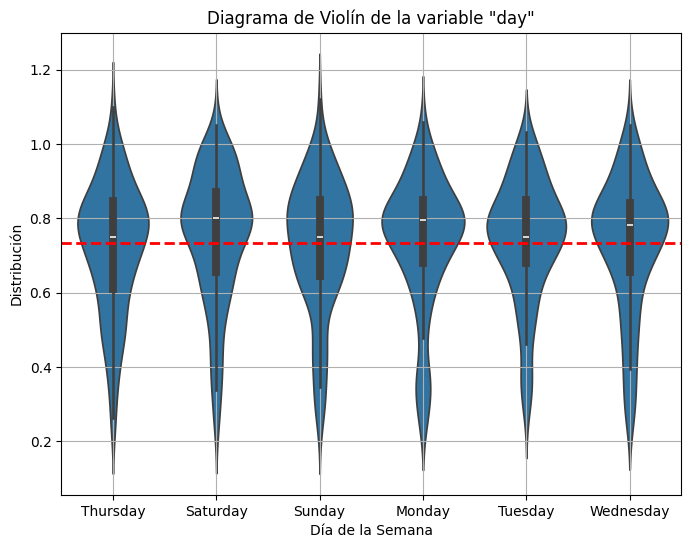

  Día de la Semana  Frecuencia
0        Wednesday         208
1           Sunday         203
2          Tuesday         201
3         Thursday         199
4           Monday         199
5         Saturday         187


<ipython-input-33-fe5b01fb4f24>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day', data=data_df, palette='viridis', order = data_df['day'].value_counts().index)


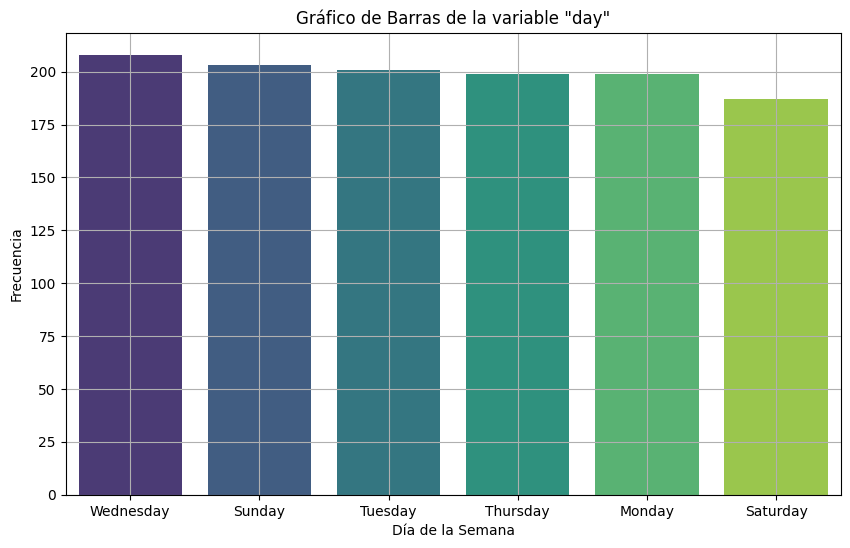

In [33]:
# Calcula el promedio de la variable Y
promedio_y = data_df['actual_productivity'].mean()

# Diagrama de Violín de la variable 'day'
plt.figure(figsize=(8, 6))
sns.violinplot(x='day', y = 'actual_productivity', data=data_df)
plt.axhline(promedio_y, color='red', linestyle='--', linewidth=2)  # Agrega la línea horizontal para el promedio
plt.title('Diagrama de Violín de la variable "day"')
plt.xlabel('Día de la Semana')
plt.ylabel('Distribución')
plt.grid(True)
plt.show()

# Tabla de Frecuencia de la variable 'day'
day_frequency_table = data_df['day'].value_counts().reset_index()
day_frequency_table.columns = ['Día de la Semana', 'Frecuencia']
print(day_frequency_table)

# Gráfico de Barras de la variable 'day'
plt.figure(figsize=(10, 6))
sns.countplot(x='day', data=data_df, palette='viridis', order = data_df['day'].value_counts().index)
plt.title('Gráfico de Barras de la variable "day"')
plt.xlabel('Día de la Semana')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [34]:
unique_categories = data_df['day'].unique()
unique_categories.shape[0]

6

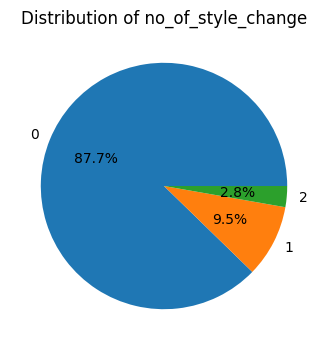

In [35]:
data_df['no_of_style_change'].value_counts().plot(kind='pie', figsize=(4, 4), autopct='%1.1f%%')
plt.title('Distribution of no_of_style_change')
plt.ylabel('')
plt.show()

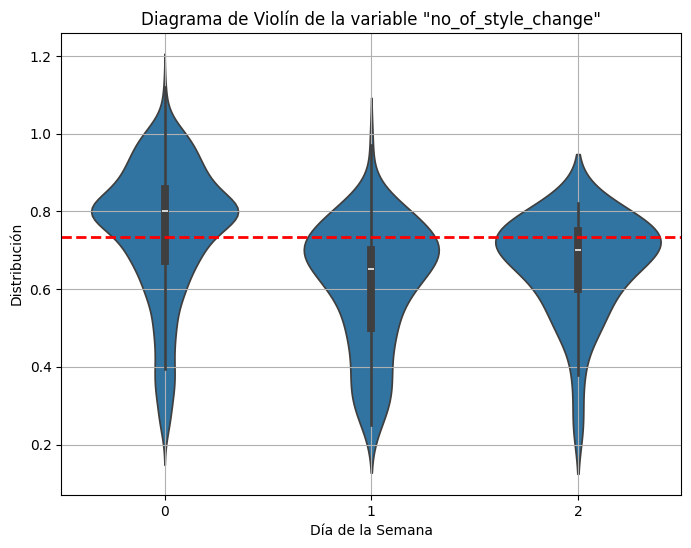

   Día de la Semana  Frecuencia
0                 0        1050
1                 1         114
2                 2          33


<ipython-input-36-28ae6c970fef>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='no_of_style_change', data=data_df, palette='viridis', order = data_df['no_of_style_change'].value_counts().index)


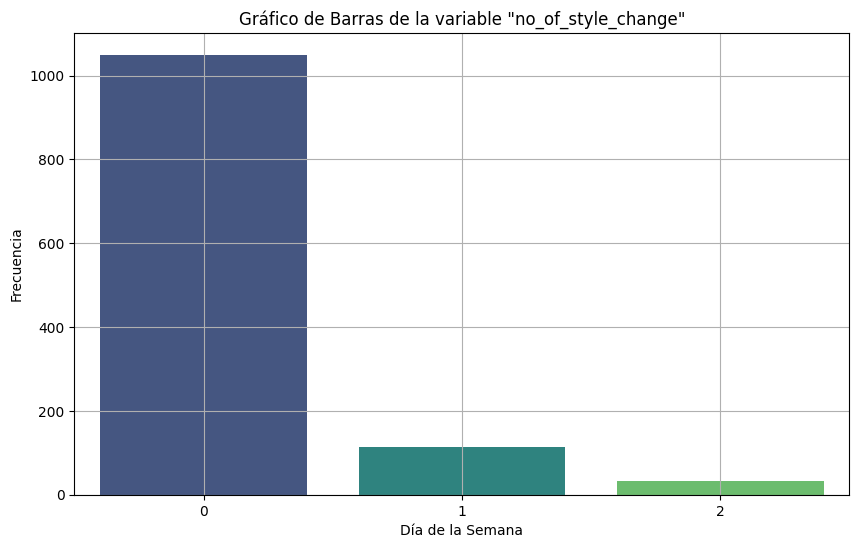

In [36]:
# Calcula el promedio de la variable Y
promedio_y = data_df['actual_productivity'].mean()

# Diagrama de Violín de la variable 'day'
plt.figure(figsize=(8, 6))
sns.violinplot(x='no_of_style_change', y = 'actual_productivity', data=data_df)
plt.axhline(promedio_y, color='red', linestyle='--', linewidth=2)  # Agrega la línea horizontal para el promedio
plt.title('Diagrama de Violín de la variable "no_of_style_change"')
plt.xlabel('Día de la Semana')
plt.ylabel('Distribución')
plt.grid(True)
plt.show()

# Tabla de Frecuencia de la variable 'day'
day_frequency_table = data_df['no_of_style_change'].value_counts().reset_index()
day_frequency_table.columns = ['Día de la Semana', 'Frecuencia']
print(day_frequency_table)

# Gráfico de Barras de la variable 'day'
plt.figure(figsize=(10, 6))
sns.countplot(x='no_of_style_change', data=data_df, palette='viridis', order = data_df['no_of_style_change'].value_counts().index)
plt.title('Gráfico de Barras de la variable "no_of_style_change"')
plt.xlabel('Día de la Semana')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

        Fecha  Frecuencia
0   3/11/2015          24
1   1/31/2015          24
2   1/11/2015          23
3   3/10/2015          23
4   1/12/2015          23
5   1/24/2015          23
6    1/8/2015          22
7   1/10/2015          22
8    1/7/2015          22
9   1/13/2015          22
10   1/5/2015          22
11   3/9/2015          22
12   3/8/2015          22
13   3/3/2015          22
14  1/22/2015          22
15  2/25/2015          21
16  2/26/2015          21
17  2/28/2015          21
18   1/3/2015          21
19   1/4/2015          21
20  1/28/2015          21
21  1/27/2015          21
22   3/4/2015          21
23  1/25/2015          21
24  1/17/2015          21
25  1/14/2015          21
26   1/6/2015          21
27  2/18/2015          21
28  1/29/2015          20
29  2/17/2015          20
30   3/2/2015          20
31   3/1/2015          20
32  2/22/2015          20
33  2/19/2015          20
34   3/5/2015          19
35   3/7/2015          19
36  2/24/2015          19
37  2/23/201

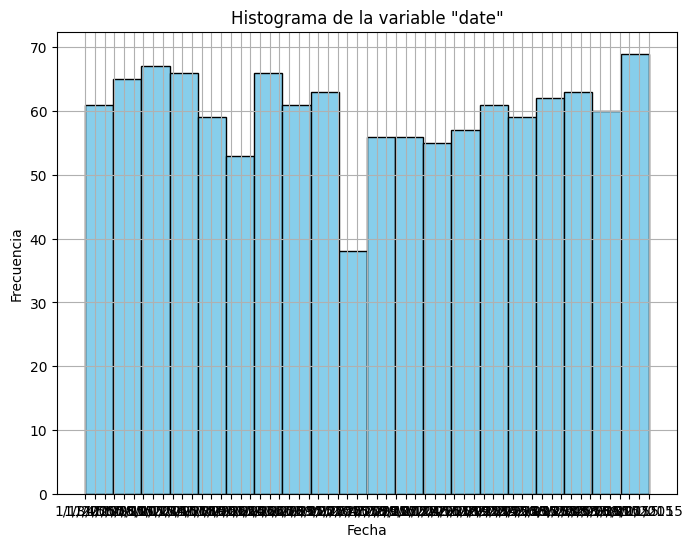

In [11]:
# Tabla de Frecuencia de la variable 'date'
date_frequency_table = data_df['date'].value_counts().reset_index()
date_frequency_table.columns = ['Fecha', 'Frecuencia']
print(date_frequency_table)

# Descripción de la variable 'date'
date_description = data_df['date'].describe()
print(date_description)

# Histograma de la variable 'date'
plt.figure(figsize=(8, 6))
plt.hist(data_df['date'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de la variable "date"')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


#### 3.3 Búsqueda de relaciones con la variable objetivo



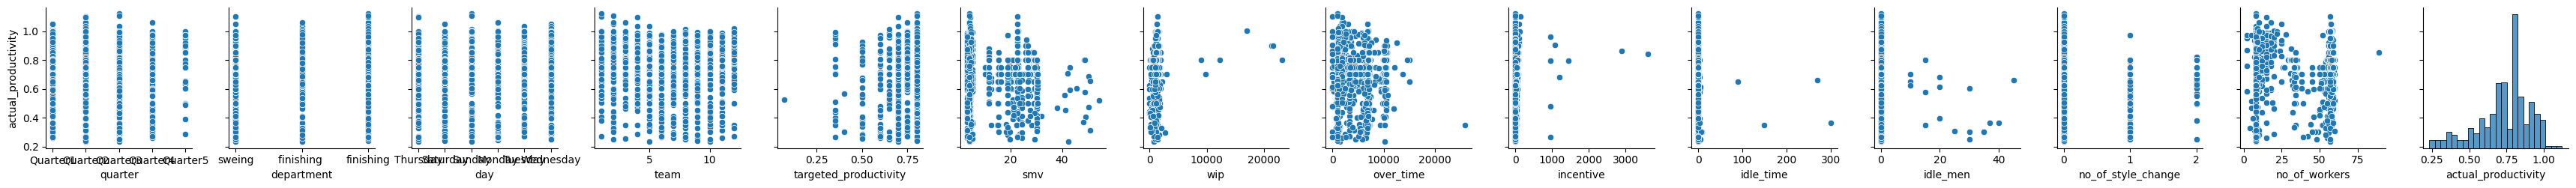

In [37]:
# Obtener todas las características excepto 'date'
caracteristicas_excepto_date = [col for col in data_df.columns if col != 'date']

# Trazar el pairplot con las características excepto 'date' en el eje x
sns.pairplot(data_df, y_vars="actual_productivity", x_vars=caracteristicas_excepto_date, kind="scatter")

##### 3.4 Búsqueda de relaciones entre las variables de entrada - Correlacion variables numericas


In [53]:
features_numericas= ['no_of_workers', 'targeted_productivity', 'smv', 'wip', 'over_time', 'idle_time', 'idle_men', 'actual_productivity']

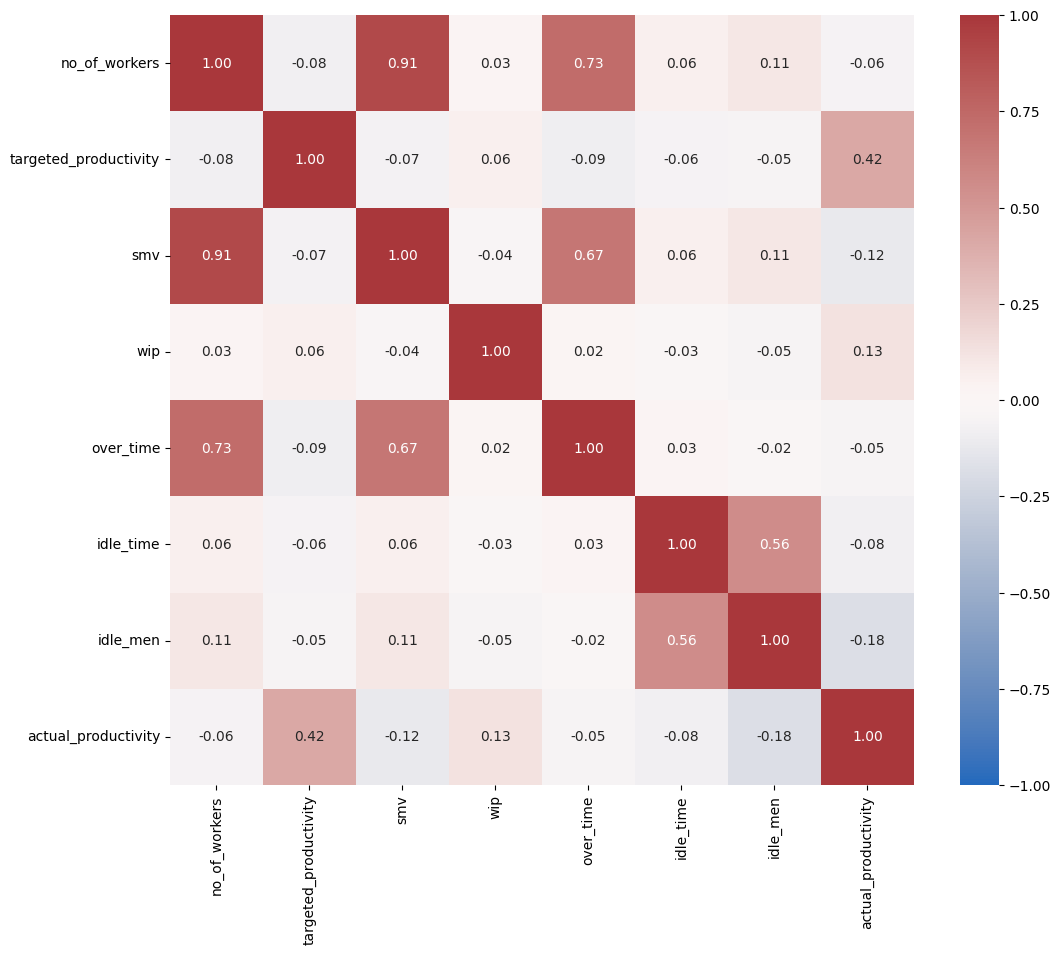

In [39]:
correlation_matrix = data_df[features_numericas].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='vlag', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.show()